In [24]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA, NMF, FastICA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding

In [2]:
df = pd.read_csv('./project-public-clean.csv')

In [3]:
df.set_index(df['EEID'], inplace=True)
df.drop(columns='EEID', inplace=True)

In [4]:
df.head()

,Status,Age,Gender,Education Level,Hire Date,Termination Date,Termination Type,Termination Reason,Job Information: Date,Division,...,Supervisor EID,Pay rate,Pay rate - Currency code,Compensation Change Reason,Stock Options,Level,Is Supervisor,Length of service,Length of service: Years,Length of service: Months
EEID,,,,,,,,,,,,,,,,,,,,,
343,Inactive,28,Female,Undergraduate degree (Grado),2019-08-19,2019-09-30,Involuntary,End of contract,2019-08-19,People,...,1,6047.0,EUR,Reduce/Increase Working hours,N,Unknown,No,"1 month, 11 days",0,1
468,Inactive,29,Male,Unknown,2016-07-05,2017-03-30,Involuntary,End of contract,2016-07-05,Engineering,...,234,6144.0,EUR,Unknown,N,Unknown,No,"8 months, 25 days",0,8
458,Inactive,27,Male,Unknown,2016-09-05,2017-01-26,Involuntary,End of contract,2016-09-05,Engineering,...,0,6144.0,EUR,Unknown,N,Unknown,No,"4 months, 21 days",0,4
379,Inactive,25,Male,Undergraduate degree (Grado),2017-10-23,2018-08-28,Involuntary,End of contract,2017-10-23,Engineering,...,0,6144.0,EUR,New hire,N,Unknown,No,"10 months, 5 days",0,10
492,Inactive,58,Female,Unknown,2017-09-13,2017-09-29,Involuntary,End of contract,2017-09-13,People,...,0,7200.0,EUR,Unknown,N,Unknown,No,16 days,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 343 to 721
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Status                      607 non-null    object 
 1   Age                         607 non-null    int64  
 2   Gender                      607 non-null    object 
 3   Education Level             607 non-null    object 
 4   Hire Date                   607 non-null    object 
 5   Termination Date            258 non-null    object 
 6   Termination Type            258 non-null    object 
 7   Termination Reason          254 non-null    object 
 8   Job Information: Date       607 non-null    object 
 9   Division                    607 non-null    object 
 10  Department                  607 non-null    object 
 11  Supervisor EID              607 non-null    int64  
 12  Pay rate                    607 non-null    float64
 13  Pay rate - Currency code    607 n

In [73]:
df.apply(lambda x: (x['Pay rate'] * 0.82) if x['Pay rate - Currency code'] == 'USD' else x['Pay rate'], axis=1)

EEID
343      6047.0
468      6144.0
458      6144.0
379      6144.0
492      7200.0
         ...   
431    173184.0
760    180400.0
773    180400.0
725    213856.0
721    262400.0
Length: 607, dtype: float64

In [55]:
df['Pay rate EUR'] = np.where(df['Pay rate - Currency code'] == 'USD', df['Pay rate'] * 0.82, df['Pay rate'])

In [56]:
df['Pay rate EUR'] = np.where(df['Pay rate - Currency code'] == 'GBP', df['Pay rate'] * 1.16, df['Pay rate EUR'])

In [65]:
df[['Pay rate', 'Pay rate - Currency code', 'Pay rate converted', 'Pay rate EUR']][df['Pay rate - Currency code'] == 'USD']

,Pay rate,Pay rate - Currency code,Pay rate converted,Pay rate EUR
EEID,,,,
428,24960.0,USD,20467.2,20467.2
457,24960.0,USD,20467.2,20467.2
691,37600.0,USD,30832.0,30832.0
541,39200.0,USD,32144.0,32144.0
626,39200.0,USD,32144.0,32144.0
...,...,...,...,...
431,211200.0,USD,173184.0,173184.0
760,220000.0,USD,180400.0,180400.0
773,220000.0,USD,180400.0,180400.0


# Analisis

Pasar variables categóricas a numéricas con el one-hot-encoding o con el get dummies

1. Identificar clusters
2. Scaling
3. Prediction

# Preprocessing: encoding and scaling

In [6]:
# antes de hacer el modelo despues de reconocer los clusters, pasar toda la matriz por standardscaler
# todas las variables categoricas tienen que estar entre 0 y 1

In [7]:
df.head()

,Status,Age,Gender,Education Level,Hire Date,Termination Date,Termination Type,Termination Reason,Job Information: Date,Division,...,Supervisor EID,Pay rate,Pay rate - Currency code,Compensation Change Reason,Stock Options,Level,Is Supervisor,Length of service,Length of service: Years,Length of service: Months
EEID,,,,,,,,,,,,,,,,,,,,,
343,Inactive,28,Female,Undergraduate degree (Grado),2019-08-19,2019-09-30,Involuntary,End of contract,2019-08-19,People,...,1,6047.0,EUR,Reduce/Increase Working hours,N,Unknown,No,"1 month, 11 days",0,1
468,Inactive,29,Male,Unknown,2016-07-05,2017-03-30,Involuntary,End of contract,2016-07-05,Engineering,...,234,6144.0,EUR,Unknown,N,Unknown,No,"8 months, 25 days",0,8
458,Inactive,27,Male,Unknown,2016-09-05,2017-01-26,Involuntary,End of contract,2016-09-05,Engineering,...,0,6144.0,EUR,Unknown,N,Unknown,No,"4 months, 21 days",0,4
379,Inactive,25,Male,Undergraduate degree (Grado),2017-10-23,2018-08-28,Involuntary,End of contract,2017-10-23,Engineering,...,0,6144.0,EUR,New hire,N,Unknown,No,"10 months, 5 days",0,10
492,Inactive,58,Female,Unknown,2017-09-13,2017-09-29,Involuntary,End of contract,2017-09-13,People,...,0,7200.0,EUR,Unknown,N,Unknown,No,16 days,0,0


In [8]:
df['Inactive'] = pd.get_dummies(df['Status'], drop_first=True)

In [9]:
df['Attrition'] = pd.get_dummies(df['Termination Type'], drop_first=True)

In [10]:
pd.get_dummies(df['Gender']).value_counts()
# quitar líneas de not specified y unknown y ponerlo todo en 1 columna de M/F - 0/1

# pd.get_dummies(drop_first=True)
# drop_first: numero de categorias que tengo menos 1. La primera columna queda automaticamente determinada por las demas, podemos llegar a predecirla. Mejor no tener todas las columnas, queremos evitar colinearidad

Female  Male  Not Specified  Unknown
0       1     0              0          397
1       0     0              0          206
0       0     1              0            3
              0              1            1
dtype: int64

In [11]:
df2 = pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)

In [12]:
df_num = df2.select_dtypes('number')

In [13]:
df_num = df_num.drop(columns='Supervisor EID')

In [14]:
# Eliminar filas cuyo 'Gender' sea 'Not Specified'
df_num.drop(df_num.loc[df_num['Not Specified'] == 1].index, inplace=True)

In [15]:
# Eliminar filas cuyo 'Gender' sea 'Unknown'
df_num.drop(df_num.loc[df_num['Unknown'] == 1].index, inplace=True)

In [16]:
# Eliminar columnas y quedarnos solo con 'Female'
df_num = df_num.drop(columns=['Male', 'Not Specified', 'Unknown'])

In [17]:
df_num.head()

,Age,Pay rate,Length of service: Years,Length of service: Months,Inactive,Attrition,Female
EEID,,,,,,,
343,28,6047.0,0,1,1,0,1
468,29,6144.0,0,8,1,0,0
458,27,6144.0,0,4,1,0,0
379,25,6144.0,0,10,1,0,0
492,58,7200.0,0,0,1,0,1


# Statistical Analysis

In [22]:
df.head()

,Status,Age,Gender,Education Level,Hire Date,Termination Date,Termination Type,Termination Reason,Job Information: Date,Division,...,Pay rate - Currency code,Compensation Change Reason,Stock Options,Level,Is Supervisor,Length of service,Length of service: Years,Length of service: Months,Inactive,Attrition
EEID,,,,,,,,,,,,,,,,,,,,,
343,Inactive,28,Female,Undergraduate degree (Grado),2019-08-19,2019-09-30,Involuntary,End of contract,2019-08-19,People,...,EUR,Reduce/Increase Working hours,N,Unknown,No,"1 month, 11 days",0,1,1,0
468,Inactive,29,Male,Unknown,2016-07-05,2017-03-30,Involuntary,End of contract,2016-07-05,Engineering,...,EUR,Unknown,N,Unknown,No,"8 months, 25 days",0,8,1,0
458,Inactive,27,Male,Unknown,2016-09-05,2017-01-26,Involuntary,End of contract,2016-09-05,Engineering,...,EUR,Unknown,N,Unknown,No,"4 months, 21 days",0,4,1,0
379,Inactive,25,Male,Undergraduate degree (Grado),2017-10-23,2018-08-28,Involuntary,End of contract,2017-10-23,Engineering,...,EUR,New hire,N,Unknown,No,"10 months, 5 days",0,10,1,0
492,Inactive,58,Female,Unknown,2017-09-13,2017-09-29,Involuntary,End of contract,2017-09-13,People,...,EUR,Unknown,N,Unknown,No,16 days,0,0,1,0


In [23]:
df['Attrition'].mean()

0.30642504118616143

In [25]:
stats.kurtosis(df['Attrition'])

-1.2947539141317397

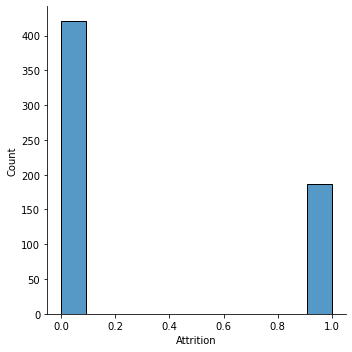

In [26]:
sns.displot(df['Attrition'])

In [27]:
stats.shapiro(df['Attrition'])

ShapiroResult(statistic=0.5796045064926147, pvalue=8.905712801610138e-36)

In [33]:
pd.get_dummies(df['Termination Type'])

,Involuntary,Voluntary
EEID,,
343,1,0
468,1,0
458,1,0
379,1,0
492,1,0
...,...,...
431,0,1
760,0,0
773,0,0


In [31]:
df.head()

,Status,Age,Gender,Education Level,Hire Date,Termination Date,Termination Type,Termination Reason,Job Information: Date,Division,...,Stock Options,Level,Is Supervisor,Length of service,Length of service: Years,Length of service: Months,Inactive,Attrition,Involuntary,Voluntary
EEID,,,,,,,,,,,,,,,,,,,,,
343,Inactive,28,Female,Undergraduate degree (Grado),2019-08-19,2019-09-30,Involuntary,End of contract,2019-08-19,People,...,N,Unknown,No,"1 month, 11 days",0,1,1,0,Involuntary,Voluntary
468,Inactive,29,Male,Unknown,2016-07-05,2017-03-30,Involuntary,End of contract,2016-07-05,Engineering,...,N,Unknown,No,"8 months, 25 days",0,8,1,0,Involuntary,Voluntary
458,Inactive,27,Male,Unknown,2016-09-05,2017-01-26,Involuntary,End of contract,2016-09-05,Engineering,...,N,Unknown,No,"4 months, 21 days",0,4,1,0,Involuntary,Voluntary
379,Inactive,25,Male,Undergraduate degree (Grado),2017-10-23,2018-08-28,Involuntary,End of contract,2017-10-23,Engineering,...,N,Unknown,No,"10 months, 5 days",0,10,1,0,Involuntary,Voluntary
492,Inactive,58,Female,Unknown,2017-09-13,2017-09-29,Involuntary,End of contract,2017-09-13,People,...,N,Unknown,No,16 days,0,0,1,0,Involuntary,Voluntary


In [43]:
df.groupby('Division').count()

,Status,Age,Gender,Education Level,Hire Date,Termination Date,Termination Type,Termination Reason,Job Information: Date,Department,...,Stock Options,Level,Is Supervisor,Length of service,Length of service: Years,Length of service: Months,Inactive,Attrition,Involuntary,Voluntary
Division,,,,,,,,,,,,,,,,,,,,,
Business Development,17,17,17,17,17,6,6,6,17,17,...,17,17,17,17,17,17,17,17,17,17
Customer Success,77,77,77,77,77,24,24,24,77,77,...,77,77,77,77,77,77,77,77,77,77
Data & Analytics,57,57,57,57,57,15,15,15,57,57,...,57,57,57,57,57,57,57,57,57,57
Design,44,44,44,44,44,18,18,18,44,44,...,44,44,44,44,44,44,44,44,44,44
Engineering,209,209,209,209,209,100,100,98,209,209,...,209,209,209,209,209,209,209,209,209,209
Finance,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Finance & Legal,14,14,14,14,14,1,1,1,14,14,...,14,14,14,14,14,14,14,14,14,14
Founders,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Home,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [ ]:
df.pivot(index='Division', columns='Attrition', values=)

## TSNE

In [18]:
def do_plot(X_fit, title=None, labels=None):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0, 1, num_labels))
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           c=[col])
        elif dimension == 3:
            ax = fig.add_subplot(111, projection='3d')
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           X_fit[labels==lab, 2],
                           c=[col])
        else:
            raise Exception('Unknown dimension: %d' % dimension)
        plt.title(title)
        plt.show()

In [19]:
# pasar categoricas a 0 y 1
# si hay mas de 2 categorias, hacer one hot encoding
# para el proyecto final, en lugar de get dummies usaria category encoders
tsne2 = TSNE(n_components=2, random_state=0)

In [20]:
do_plot(tsne2.fit_transform(df_num), 't-SNE', labels)

NameError: name 'labels' is not defined